# Geely Automobile 

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

## Step 1: Reading and Understanding the Data

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
#Importing dataset
car_df = pd.read_csv('CarPrice_Assignment.csv')

In [49]:
#analyze the dataframe
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [50]:
# Total records in the dataframe is 205 and 26 columns
car_df.shape

(205, 26)

In [51]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Seems like there is no null value in the dataframe , hence cleaning and imputing is not required

### Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [52]:
#Removing the car Name from the dataframe and renaming the column to Car Company
car_df['CarName']=car_df['CarName'].str.split(' ').str[0]
car_df.rename(index=str, columns={"CarName": "CarCompany"},inplace=True)

In [53]:
#analyze the dataframe
car_df.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
#checking the distinct value in dataframe
car_df.nunique()

car_ID              205
symboling             6
CarCompany           28
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

#### Covert the characters to numerical values for column with distinct value as 2
- FuelType 1(Gas) 0(Diesel)
- Aspiration 1(Std) 0(Turbo)
- DoorNumber 1(two) 0(Four)
- EngineLocation 1(front) 0(rear)

In [55]:
car_df['fueltype']=car_df['fueltype'].map({'gas':1,'diesel':0})

In [56]:
car_df['aspiration']=car_df['aspiration'].map({'std':1,'turbo':0})

In [57]:
car_df['doornumber']=car_df['doornumber'].map({'two':1,'four':0})

In [58]:
car_df['enginelocation']=car_df['enginelocation'].map({'front':1,'rear':0})

In [59]:
car_df.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,1,1,1,hatchback,rwd,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,1,1,0,sedan,fwd,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,1,1,0,sedan,4wd,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Dummy Variables

In [62]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'body'
body = pd.get_dummies(car_df['carbody'])

In [67]:
body.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


Now, we don't need five columns. We can drop the `convertible` column, as the type of body can be identified with just the four columns where — 

In [68]:
# Let's drop the first column from status df using 'drop_first = True'
body = pd.get_dummies(car_df['carbody'], drop_first = True)

# Add the results to the original Car dataframe
car_df = pd.concat([car_df, body], axis = 1)
car_df.head()

In [70]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'drivewheel_dummy'
drivewheel_dummy = pd.get_dummies(car_df['drivewheel'], drop_first = True)
# Add the results to the original Car dataframe
car_df = pd.concat([car_df, drivewheel_dummy], axis = 1)
car_df.head()

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,5000,21,27,13495.0,0,0,0,0,0,1
1,2,3,alfa-romero,1,1,1,convertible,rwd,1,88.6,...,5000,21,27,16500.0,0,0,0,0,0,1
2,3,1,alfa-romero,1,1,1,hatchback,rwd,1,94.5,...,5000,19,26,16500.0,0,1,0,0,0,1
3,4,2,audi,1,1,0,sedan,fwd,1,99.8,...,5500,24,30,13950.0,0,0,1,0,1,0
4,5,2,audi,1,1,0,sedan,4wd,1,99.4,...,5500,18,22,17450.0,0,0,1,0,0,0


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

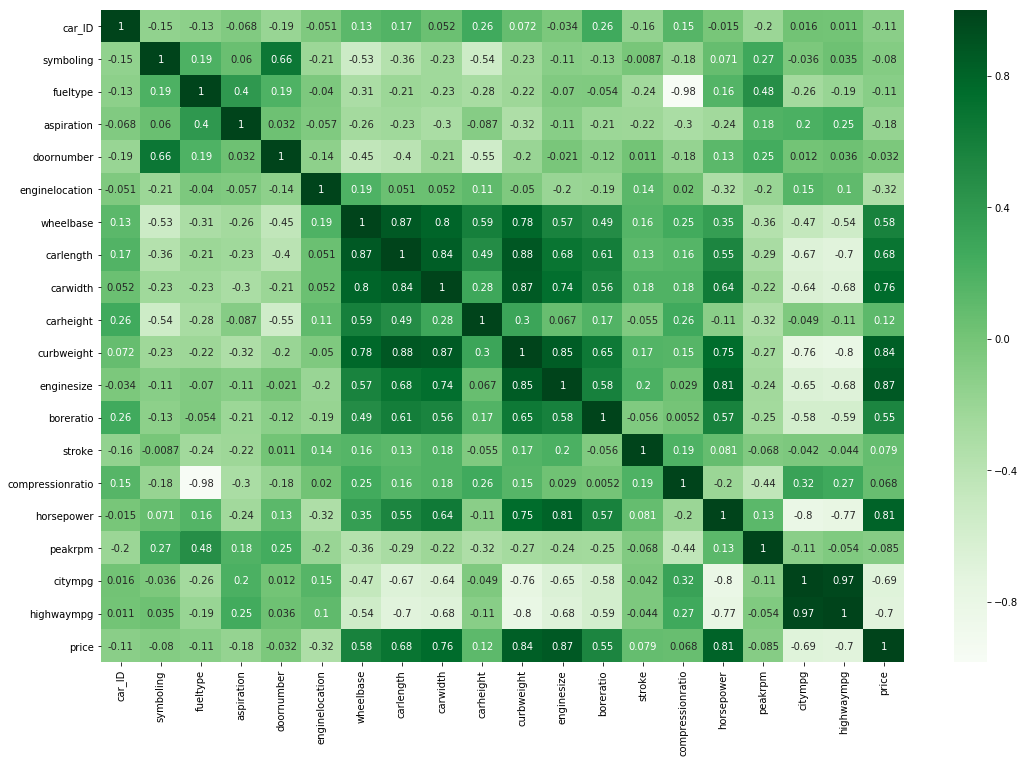

In [61]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(car_df.corr(), 
            xticklabels=car_df.corr().columns.values,
            yticklabels=car_df.corr().columns.values,annot= True,cmap="Greens")
plt.show()

In [ ]:
#sns.pairplot(car_df)
#plt.show()

In [ ]:
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'fuel'
#fuel = pd.get_dummies(car_df['fueltype'])

In [ ]:
#fuel.head()